In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [6]:
amazon = pd.read_csv('amazon.csv')

In [7]:
amazon.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

In [8]:
amazon.shape

(1465, 16)

In [9]:
amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [10]:
newAmazon = amazon[['product_id','user_id','category']]

In [11]:
Df2 = amazon[['product_name','product_id']]

In [12]:
Df2

,product_name,product_id
0,Wayona Nylon Braided USB to Lightning Fast Cha...,B07JW9H4J1
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,B098NS6PVG
2,Sounce Fast Phone Charging Cable & Data Sync U...,B096MSW6CT
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,B08HDJ86NZ
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,B08CF3B7N1
...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,B08L7J3T31
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,B01M6453MB
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,B009P2LIL4
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,B00J5DYCCA


In [13]:
newAmazon.head(2)

,product_id,user_id,category
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Computers&Accessories|Accessories&Peripherals|...


In [14]:
newAmazon.isnull().sum()

product_id    0
user_id       0
category      0
dtype: int64

In [15]:
newAmazon.shape


(1465, 3)

In [16]:
newAmazon.drop_duplicates(inplace=True)

C:\Users\SHKIL\AppData\Local\Temp\ipykernel_3812\512822163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newAmazon.drop_duplicates(inplace=True)


In [17]:
newAmazon.shape

(1361, 3)

In [18]:
newAmazon.head(2)

,product_id,user_id,category
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Computers&Accessories|Accessories&Peripherals|...


In [19]:
newAmazon.shape

(1361, 3)

In [20]:
newAmazon = newAmazon[newAmazon.category != '|']

In [21]:
# Keep 'product_id' as string identifier
newAmazon['product_id'] = newAmazon['product_id'].astype(str)

# Keep 'product_id' as string identifier
newAmazon['category'] = newAmazon['category'].astype(str)


In [22]:
newAmazon.drop_duplicates(inplace=True)

In [23]:
newAmazon.head(5)

,product_id,user_id,category
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Computers&Accessories|Accessories&Peripherals|...
2,B096MSW6CT,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",Computers&Accessories|Accessories&Peripherals|...
3,B08HDJ86NZ,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",Computers&Accessories|Accessories&Peripherals|...
4,B08CF3B7N1,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",Computers&Accessories|Accessories&Peripherals|...


In [24]:
type(newAmazon)

pandas.core.frame.DataFrame

In [25]:
newAmazon.product_id = LabelEncoder().fit_transform(newAmazon.product_id)
newAmazon.user_id = LabelEncoder().fit_transform(newAmazon.user_id)
newAmazon.category = LabelEncoder().fit_transform(newAmazon.category)
Df2.product_id = LabelEncoder().fit_transform(Df2.product_id)

C:\Users\SHKIL\AppData\Local\Temp\ipykernel_3812\2376716330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df2.product_id = LabelEncoder().fit_transform(Df2.product_id)


In [26]:
Df2

,product_name,product_id
0,Wayona Nylon Braided USB to Lightning Fast Cha...,346
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,848
2,Sounce Fast Phone Charging Cable & Data Sync U...,819
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,643
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,588
...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,673
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,201
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,27
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,61


In [27]:
newAmazon

,product_id,user_id,category
0,346,623,10
1,848,88,10
2,819,849,10
3,643,254,10
4,588,17,10
...,...,...,...
1460,673,1050,192
1461,201,425,172
1462,27,865,138
1463,61,300,129


In [28]:
trainSet, testSet = train_test_split(newAmazon, test_size=0.4, random_state=42)

In [29]:
type(newAmazon)

pandas.core.frame.DataFrame

In [30]:
trainSet

,product_id,user_id,category
1437,62,1023,189
1446,984,898,135
215,1187,640,98
1143,841,457,169
27,808,595,10
...,...,...,...
1199,526,883,144
1234,185,750,127
1398,1182,379,165
947,1153,482,31


In [31]:
testSet

,product_id,user_id,category
51,226,351,10
1206,376,937,170
1418,153,930,173
532,950,697,117
1356,1239,611,178
...,...,...,...
362,672,633,58
2,819,849,10
6,761,662,10
311,919,650,89


In [32]:
model = NearestNeighbors(metric='cosine', algorithm='brute')

In [33]:
model.fit(trainSet)

NearestNeighbors(algorithm='brute', metric='cosine')

In [34]:
distances, indices = model.kneighbors(trainSet)

In [35]:
distances

array([[0.00000000e+00, 9.12605344e-05, 1.29621078e-04, 2.10878040e-04,
        3.56729735e-04],
       [0.00000000e+00, 7.01812432e-06, 5.93186004e-05, 6.00534001e-05,
        7.71744856e-05],
       [0.00000000e+00, 3.02353438e-05, 7.77492299e-05, 8.10520094e-05,
        9.27518690e-05],
       ...,
       [2.22044605e-16, 2.53719363e-05, 4.99590974e-05, 5.63420046e-05,
        6.91631079e-05],
       [0.00000000e+00, 1.39758606e-04, 1.50675150e-04, 1.51277902e-04,
        2.37847677e-04],
       [1.11022302e-16, 1.05137523e-05, 5.85664531e-05, 7.79796788e-05,
        9.11442249e-05]])

In [36]:
indices

array([[  0, 571, 194,  81,  65],
       [  1, 166, 311, 151, 795],
       [  2, 444, 462, 761, 567],
       ...,
       [813, 544,  71, 228, 634],
       [814, 645, 338, 258,  38],
       [815, 265, 532, 143, 321]], dtype=int64)

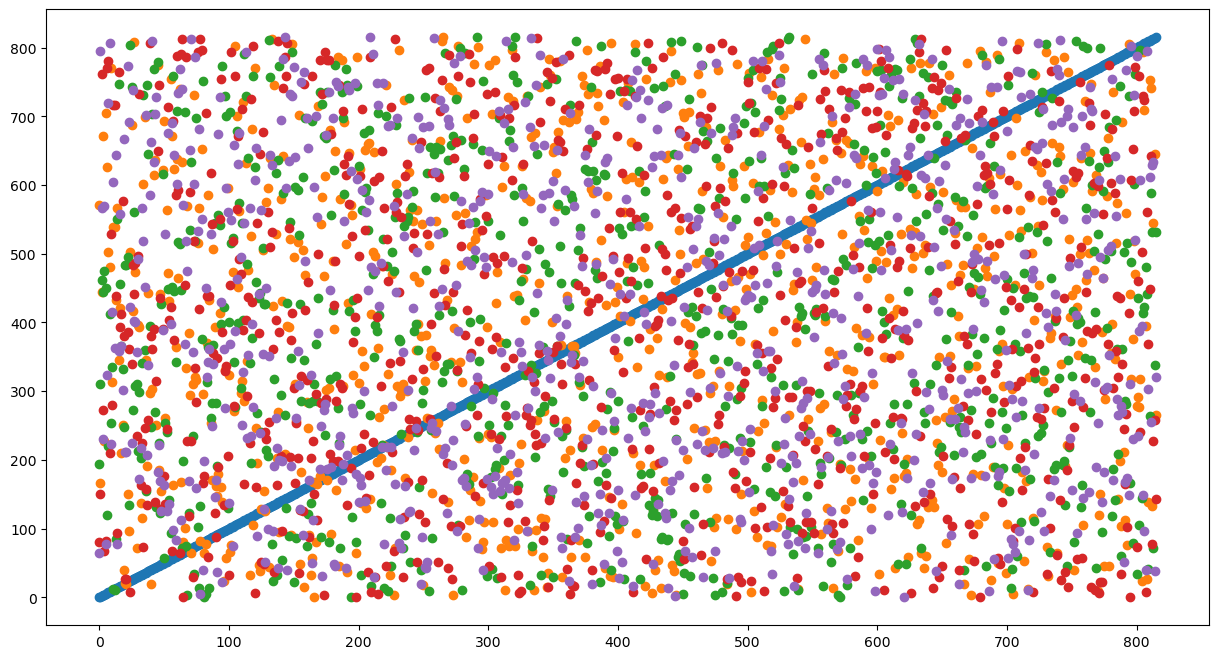

In [37]:
plt.figure(figsize=(15, 8))
plt.scatter(x=range(0, len(indices)), y=indices[:, 0])
plt.scatter(x=range(0, len(indices)), y=indices[:, 1])
plt.scatter(x=range(0, len(indices)), y=indices[:, 2])
plt.scatter(x=range(0, len(indices)), y=indices[:, 3])
plt.scatter(x=range(0, len(indices)), y=indices[:, 4])
plt.show()

In [38]:
def predict(model, data, n_recommendations, product_names_df):
    distances, indices = model.kneighbors(data)
    
    for i in range(len(data)):
        product_id = data.iloc[i, 0]
        
        matching_rows = product_names_df[product_names_df['product_id'] == product_id]
        
        if not matching_rows.empty:
            product_name = matching_rows['product_name'].values[0][:20]
            
            print(f"Recommendations for product {product_name}-({product_id}):")
        
            
            for j in range(1, n_recommendations + 1):
                try:
                    recommended_product_id = data.iloc[indices[i, j], 0]
                    recommended_matching_rows = product_names_df[product_names_df['product_id'] == recommended_product_id]
                    
                    if not recommended_matching_rows.empty:
                        recommended_product_name = recommended_matching_rows['product_name'].values[0][:20]  
                        print(f"{j}: {recommended_product_name}, with distance of {distances[i, j]}")
                    else:
                        print(f"{j}: No matching product name for ID {recommended_product_id}, with distance of {distances[i, j]}")
                        
                except IndexError:
                    print("No more recommendations")
                    break  
        
        else:
            print(f"No matching product name for ID {product_id}")

        print("\n")


In [52]:
predict(model, trainSet, 5, Df2)

Recommendations for product Karcher WD3 EU Wet a-(62):
1: Eureka Forbes Aquasu, with distance of 9.126053441499415e-05
2: Crompton IHL 152 150, with distance of 0.00012962107809200152
3: Wipro Smartlife Supe, with distance of 0.00021087803982633435
4: Casio FX-82MS 2nd Ge, with distance of 0.0003567297354128973
No more recommendations


Recommendations for product Hilton Quartz Heater-(984):
1: Lifelong LLFH921 Reg, with distance of 7.01812431658233e-06
2: SaleOn Instant Coal , with distance of 5.93186003806645e-05
3: Aqua d pure Active C, with distance of 6.005340014569871e-05
4: Pigeon 1.5 litre Hot, with distance of 7.717448555522033e-05
No more recommendations


Recommendations for product Karbonn 80 cm (32 In-(1187):
1: Logitech M221 Wirele, with distance of 3.023534380697246e-05
2: OnePlus 80 cm (32 in, with distance of 7.774922989212119e-05
3: OnePlus 108 cm (43 i, with distance of 8.105200939900747e-05
4: STRIFF 12 Pieces Hig, with distance of 9.275186899315724e-05
No more reco

2: Infinity (JBL Fuze P, with distance of 0.00031385422974528066
3: Mi Air Purifier 3 wi, with distance of 0.00040870945968041195
4: Amazon Basics 10.2 G, with distance of 0.0004565519140231622
No more recommendations


Recommendations for product Longway Blaze 2 Rod -(1336):
1: Croma 80 cm (32 Inch, with distance of 4.5043080451057094e-05
2: Dealfreez Case Compa, with distance of 8.364559507656466e-05
3: OnePlus 10T 5G (Moon, with distance of 8.523946840821583e-05
4: DYAZO USB 3.0 Type C, with distance of 9.523465673633158e-05
No more recommendations


Recommendations for product Lapster 1.5 mtr USB -(855):
1: boAt Deuce USB 300 2, with distance of 0.00021966983981258625
2: King Shine Multi Ret, with distance of 0.00023392164446967012
3: boAt LTG 550v3 Light, with distance of 0.0005229473195309531
4: Belkin USB C to USB-, with distance of 0.000572235327519488
No more recommendations


Recommendations for product Lenovo USB A to Type-(1015):
1: Portronics Konnect L, with distance of 1.

1: VAPJA® Portable Mini, with distance of 1.0449210589458247e-05
2: Redmi 80 cm (32 inch, with distance of 7.298035057490271e-05
3: boAt Rockerz 370 On , with distance of 8.556304615781052e-05
4: Fire-Boltt Ring Pro , with distance of 0.00010119031710975612
No more recommendations


Recommendations for product Fire-Boltt India's N-(1111):
1: Redmi Note 11 (Space, with distance of 6.646418749634009e-05
2: Redmi Note 11 (Space, with distance of 7.058405626247932e-05
3: Noise ColorFit Pro 4, with distance of 0.000121617529710627
4: Duracell Chhota Powe, with distance of 0.00013473599650781765
No more recommendations


Recommendations for product Acer 80 cm (32 inche-(1138):
1: Acer 109 cm (43 inch, with distance of 5.860136587099163e-08
2: TCL 80 cm (32 inches, with distance of 4.423743782289158e-06
3: WeCool B1 Mobile Hol, with distance of 4.3675528476505576e-05
4: ZEBRONICS Zeb-Buds 3, with distance of 6.135318281341728e-05
No more recommendations


Recommendations for product Samsung 2

Recommendations for product Havells Ambrose 1200-(188):
1: Classmate Octane Neo, with distance of 0.009453234948712086
2: Sujata Chutney Steel, with distance of 0.010037459666611404
3: Prestige Iris 750 Wa, with distance of 0.012172312632953708
4: Havells Instanio 3-L, with distance of 0.015381010678917728
No more recommendations


Recommendations for product Havells Ventil Air D-(61):
1: Pilot Frixion Clicke, with distance of 0.0006629865374333521
2: Camel Oil Pastel wit, with distance of 0.0015714239117032847
3: 3M Post-it Sticky No, with distance of 0.0026999366145683545
4: Luminous Vento Delux, with distance of 0.004306791968882506
No more recommendations


Recommendations for product SanDisk Extreme SD U-(1085):
1: E-COSMOS 5V 1.2W Por, with distance of 3.3197797809969565e-05
2: CP PLUS 2MP Full HD , with distance of 0.0001285230699955564
3: Gizga Essentials Web, with distance of 0.0006033044736571958
4: Ambrane Unbreakable , with distance of 0.0007512071854871571
No more recommen

4: Lava Charging Adapte, with distance of 4.7055336612533694e-05
No more recommendations


Recommendations for product Eureka Forbes Aquasu-(75):
1: Crompton IHL 152 150, with distance of 5.798750973018407e-05
2: Karcher WD3 EU Wet a, with distance of 9.126053441499415e-05
3: Bajaj RHX-2 800-Watt, with distance of 0.00042441529026349123
4: Wipro Smartlife Supe, with distance of 0.0005689745763610699
No more recommendations


Recommendations for product HP 150 Wireless USB -(905):
1: Ambrane Unbreakable , with distance of 0.00010541542148501115
2: MI 2-in-1 USB Type C, with distance of 0.0003111740590427958
3: E-COSMOS Plug in LED, with distance of 0.0005446271655917823
4: Zebronics Zeb-Transf, with distance of 0.0007676710546528076
No more recommendations


Recommendations for product Macmillan Aquafresh -(930):
1: Glen 3 in 1 Electric, with distance of 0.0007218704896047035
2: Candes 10 Litre Perf, with distance of 0.0011074282281428038
3: Demokrazy New Nova L, with distance of 0.0011

3: Cello Quick Boil Pop, with distance of 0.002737778699604565
4: Wonderchef Nutri-ble, with distance of 0.006107558444859329
No more recommendations


Recommendations for product Rico IRPRO 1500 Watt-(129):
1: Borosil Chef Delite , with distance of 0.0006919364009788653
2: Prestige Electric Ke, with distance of 0.000983829463991115
3: Eureka Forbes Trendy, with distance of 0.001149016240467593
4: Preethi MGA-502 0.4-, with distance of 0.001149872994716583
No more recommendations


Recommendations for product iPhone Original 20W -(1209):
1: OnePlus Nord Watch w, with distance of 1.5801489799183166e-05
2: Newly Launched Boult, with distance of 5.724175097987505e-05
3: OnePlus 108 cm (43 i, with distance of 8.263798564134284e-05
4: Airtel Digital TV HD, with distance of 0.0001394605433570062
No more recommendations


Recommendations for product Redmi 80 cm (32 inch-(897):
1: Fire-Boltt Ring Pro , with distance of 1.2804979500624647e-05
2: Activa Heat-Max 2000, with distance of 4.87053547